In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# read the dataset
df = pd.read_excel('SeerCancerDSfinal.xlsx')

In [2]:
# filter the dataset
def Survival(row):
    if (row['Survival months'] >= 60) and (row['Vital status recode (study cutoff used)'] == 'Alive'):
        return 1
    elif (row['Survival months'] < 60) and (row['SEER cause-specific death classification'] == 'Dead (attributable to this cancer dx)'):
        return 0
    else:
        df.drop(index=row.name, inplace=True)



df['Survived'] = df.apply(Survival, axis=1)
df[:5]

,Patient ID,Age recode with <1 year olds,Behavior code ICD-O-3,SEER cause-specific death classification,Vital status recode (study cutoff used),Survival months,"Race recode (W, B, AI, API)",Sex,Radiation recode,COD to site recode,Tumor Size Summary (2016+),Regional nodes examined (1988+),Regional nodes positive (1988+),Grade Recode (thru 2017),Primary Site,Median household income inflation adj to 2021,Marital status at diagnosis,Survived
0,5676,65-69 years,Malignant,Dead (attributable to this cancer dx),Dead,6,White,Male,"Radiation, NOS method or source not specified",Lung and Bronchus,Blank(s),1,1,Unknown,341,"$75,000+",Married (including common law),0.0
1,6811,70-74 years,Malignant,Dead (attributable to this cancer dx),Dead,47,White,Female,"Radiation, NOS method or source not specified",Lung and Bronchus,Blank(s),0,98,Poorly differentiated; Grade III,341,"$75,000+",Widowed,0.0
2,9672,85+ years,Malignant,Alive or dead of other cause,Alive,71,White,Female,"Radiation, NOS method or source not specified",Alive,Blank(s),1,0,Moderately differentiated; Grade II,508,"$75,000+",Married (including common law),1.0
3,9768,60-64 years,Malignant,Alive or dead of other cause,Alive,161,White,Female,"Radiation, NOS method or source not specified",Alive,Blank(s),1,0,Well differentiated; Grade I,508,"$75,000+",Married (including common law),1.0
4,9853,75-79 years,Malignant,Dead (attributable to this cancer dx),Dead,18,Asian or Pacific Islander,Male,"Radiation, NOS method or source not specified",Miscellaneous Malignant Cancer,Blank(s),0,98,Unknown,341,"$75,000+",Married (including common law),0.0


In [3]:
import re

#get the first two interger from a string
def get_first_two_ints(s):
    numbers = re.findall(r'\d+', s)
    return [int(num) for num in numbers[:2]]

# convert to numerical form
df['Age'] = None
df['Income'] = None
df['Tumor Size'] = None
df['Grade Recode'] = None

GR = {'Unknown': 0,'Undifferentiated; anaplastic; Grade IV': 4, 'Poorly differentiated; Grade III': 3, 'Moderately differentiated; Grade II': 2, 'Well differentiated; Grade I': 1}

for index, row in df.iterrows():
    df.at[index, 'Age'] = df.at[index, 'Age recode with <1 year olds'][:2]
    df.at[index, 'Income'] = get_first_two_ints(df.at[index, 'Median household income inflation adj to 2021'])[0]
    if df.at[index, 'Tumor Size Summary (2016+)'] == 'Blank(s)':
        df.at[index, 'Tumor Size'] = 0
    else: 
        df.at[index, 'Tumor Size'] = df.at[index, 'Tumor Size Summary (2016+)']
    df.at[index, 'Grade Recode'] = GR[df.at[index, 'Grade Recode (thru 2017)']]

df['Survived'] = df['Survived'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Income'] = df['Income'].astype(int)
df['Tumor Size'] = df['Tumor Size'].astype(int)
df['Grade Recode'] = df['Grade Recode'].astype(int)
df

,Patient ID,Age recode with <1 year olds,Behavior code ICD-O-3,SEER cause-specific death classification,Vital status recode (study cutoff used),Survival months,"Race recode (W, B, AI, API)",Sex,Radiation recode,COD to site recode,...,Regional nodes positive (1988+),Grade Recode (thru 2017),Primary Site,Median household income inflation adj to 2021,Marital status at diagnosis,Survived,Age,Income,Tumor Size,Grade Recode
0,5676,65-69 years,Malignant,Dead (attributable to this cancer dx),Dead,6,White,Male,"Radiation, NOS method or source not specified",Lung and Bronchus,...,1,Unknown,341,"$75,000+",Married (including common law),0,65,75,0,0
1,6811,70-74 years,Malignant,Dead (attributable to this cancer dx),Dead,47,White,Female,"Radiation, NOS method or source not specified",Lung and Bronchus,...,98,Poorly differentiated; Grade III,341,"$75,000+",Widowed,0,70,75,0,3
2,9672,85+ years,Malignant,Alive or dead of other cause,Alive,71,White,Female,"Radiation, NOS method or source not specified",Alive,...,0,Moderately differentiated; Grade II,508,"$75,000+",Married (including common law),1,85,75,0,2
3,9768,60-64 years,Malignant,Alive or dead of other cause,Alive,161,White,Female,"Radiation, NOS method or source not specified",Alive,...,0,Well differentiated; Grade I,508,"$75,000+",Married (including common law),1,60,75,0,1
4,9853,75-79 years,Malignant,Dead (attributable to this cancer dx),Dead,18,Asian or Pacific Islander,Male,"Radiation, NOS method or source not specified",Miscellaneous Malignant Cancer,...,98,Unknown,341,"$75,000+",Married (including common law),0,75,75,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,31961903,65-69 years,Malignant,Dead (attributable to this cancer dx),Dead,1,White,Male,"Radiation, NOS method or source not specified",Lung and Bronchus,...,98,Unknown,349,"$60,000 - $64,999",Married (including common law),0,65,60,0,0
4746,31962914,60-64 years,Malignant,Dead (attributable to this cancer dx),Dead,27,White,Female,"Radiation, NOS method or source not specified",Lung and Bronchus,...,98,Unknown,341,"$45,000 - $49,999",Married (including common law),0,60,45,0,0
4749,31969232,75-79 years,Malignant,Alive or dead of other cause,Alive,64,White,Female,"Radiation, NOS method or source not specified",Alive,...,98,Well differentiated; Grade I,342,"$45,000 - $49,999",Married (including common law),1,75,45,0,1
4751,31978145,65-69 years,Malignant,Dead (attributable to this cancer dx),Dead,0,Black,Male,"Radiation, NOS method or source not specified",Lung and Bronchus,...,98,Unknown,341,"$50,000 - $54,999",Married (including common law),0,65,50,999,0


In [4]:
df.describe()
# df.shape

,Patient ID,Survival months,Regional nodes examined (1988+),Regional nodes positive (1988+),Primary Site,Survived,Age,Income,Tumor Size,Grade Recode
count,3.922000e+03,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000
mean,1.264573e+07,76.761601,8.643549,48.989291,420.640235,0.529577,60.506119,67.707802,20.987506,1.715451
std,1.052256e+07,64.895616,20.651908,48.339264,137.917080,0.499188,12.151496,9.392992,137.078056,1.193842
min,5.676000e+03,0.000000,0.000000,0.000000,150.000000,0.000000,20.000000,35.000000,0.000000,0.000000
25%,1.155575e+06,12.000000,0.000000,0.000000,341.000000,0.000000,55.000000,65.000000,0.000000,1.000000
50%,1.105675e+07,68.000000,1.000000,16.500000,502.000000,1.000000,60.000000,70.000000,0.000000,2.000000
75%,2.428589e+07,136.000000,7.000000,98.000000,508.000000,1.000000,70.000000,75.000000,0.000000,3.000000
max,3.197830e+07,203.000000,99.000000,99.000000,619.000000,1.000000,85.000000,75.000000,999.000000,4.000000


In [5]:
#get all categorical columns
cat_columns = df.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [6]:
df

,Patient ID,Age recode with <1 year olds,Behavior code ICD-O-3,SEER cause-specific death classification,Vital status recode (study cutoff used),Survival months,"Race recode (W, B, AI, API)",Sex,Radiation recode,COD to site recode,...,Regional nodes positive (1988+),Grade Recode (thru 2017),Primary Site,Median household income inflation adj to 2021,Marital status at diagnosis,Survived,Age,Income,Tumor Size,Grade Recode
0,5676,0,0,0,0,6,0,0,0,0,...,1,0,341,0,0,0,65,75,0,0
1,6811,1,0,0,0,47,0,1,0,0,...,98,1,341,0,1,0,70,75,0,3
2,9672,2,0,1,1,71,0,1,0,1,...,0,2,508,0,0,1,85,75,0,2
3,9768,3,0,1,1,161,0,1,0,1,...,0,3,508,0,0,1,60,75,0,1
4,9853,4,0,0,0,18,1,0,0,2,...,98,0,341,0,0,0,75,75,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,31961903,0,0,0,0,1,0,0,0,0,...,98,0,349,4,0,0,65,60,0,0
4746,31962914,3,0,0,0,27,0,1,0,0,...,98,0,341,7,0,0,60,45,0,0
4749,31969232,4,0,1,1,64,0,1,0,1,...,98,3,342,7,0,1,75,45,0,1
4751,31978145,0,0,0,0,0,2,0,0,0,...,98,0,341,5,0,0,65,50,999,0


In [7]:
# make a new data frame and store the useful attributes
final = df[['Race recode (W, B, AI, API)', 
           'Sex',
           'Radiation recode',
           'Regional nodes examined (1988+)',
           'Regional nodes positive (1988+)',
           'Primary Site',
           'Marital status at diagnosis',
           'Survived',
           'Age',
           'Income',
           'Tumor Size',
           'Grade Recode']]
final

,"Race recode (W, B, AI, API)",Sex,Radiation recode,Regional nodes examined (1988+),Regional nodes positive (1988+),Primary Site,Marital status at diagnosis,Survived,Age,Income,Tumor Size,Grade Recode
0,0,0,0,1,1,341,0,0,65,75,0,0
1,0,1,0,0,98,341,1,0,70,75,0,3
2,0,1,0,1,0,508,0,1,85,75,0,2
3,0,1,0,1,0,508,0,1,60,75,0,1
4,1,0,0,0,98,341,0,0,75,75,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4745,0,0,0,0,98,349,0,0,65,60,0,0
4746,0,1,0,0,98,341,0,0,60,45,0,0
4749,0,1,0,0,98,342,0,1,75,45,0,1
4751,2,0,0,0,98,341,0,0,65,50,999,0


In [8]:
X = final.drop('Survived', axis='columns')
X

,"Race recode (W, B, AI, API)",Sex,Radiation recode,Regional nodes examined (1988+),Regional nodes positive (1988+),Primary Site,Marital status at diagnosis,Age,Income,Tumor Size,Grade Recode
0,0,0,0,1,1,341,0,65,75,0,0
1,0,1,0,0,98,341,1,70,75,0,3
2,0,1,0,1,0,508,0,85,75,0,2
3,0,1,0,1,0,508,0,60,75,0,1
4,1,0,0,0,98,341,0,75,75,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4745,0,0,0,0,98,349,0,65,60,0,0
4746,0,1,0,0,98,341,0,60,45,0,0
4749,0,1,0,0,98,342,0,75,45,0,1
4751,2,0,0,0,98,341,0,65,50,999,0


In [9]:
y = final['Survived']
y

0       0
1       0
2       1
3       1
4       0
       ..
4745    0
4746    0
4749    1
4751    0
4752    0
Name: Survived, Length: 3922, dtype: int64

In [10]:
# create train and test data
X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3137, 11)
(785, 11)
(3137,)
(785,)


In [11]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# build the model
rf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)
rf.fit(X_train, y_train)

# make prediction on the testing data
y_pred = rf.predict(X_test)

# classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       372
           1       0.89      0.88      0.88       413

    accuracy                           0.88       785
   macro avg       0.88      0.88      0.88       785
weighted avg       0.88      0.88      0.88       785



# SHAP

In [12]:
# import shap and data visualization tool
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

Variable Importance Plot - Global Interpretation


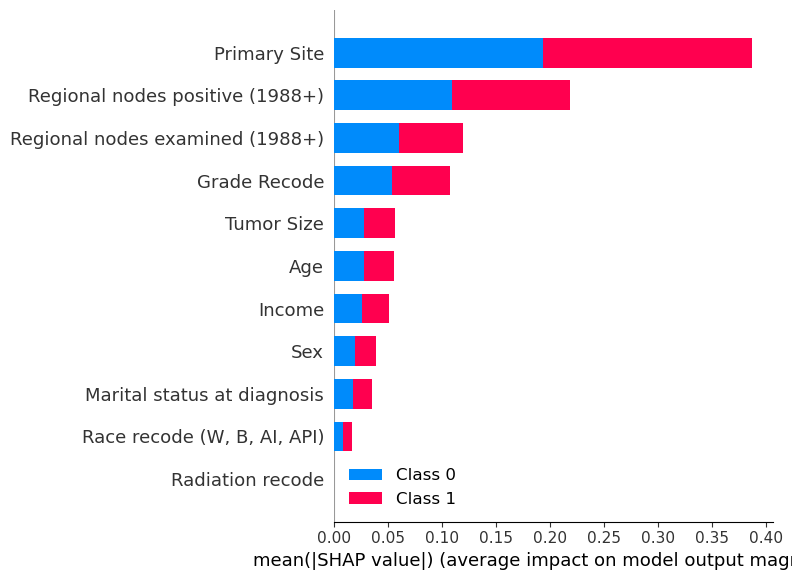

In [13]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

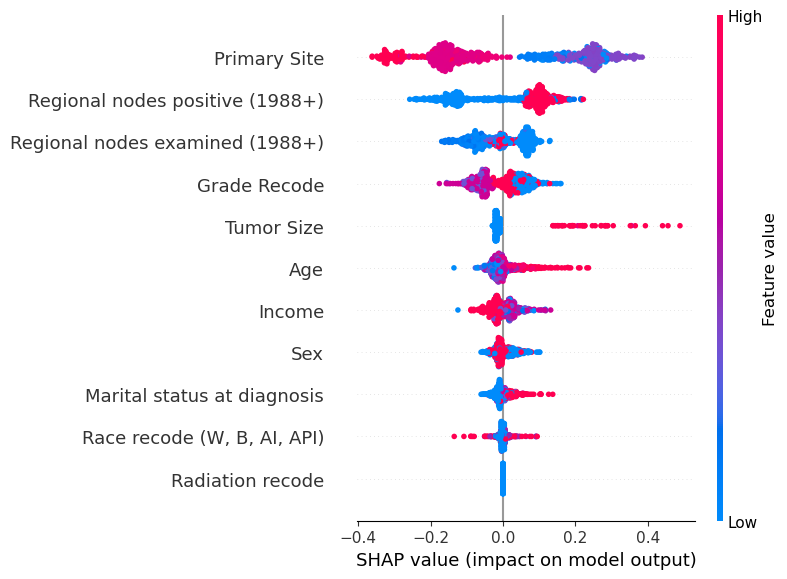

In [16]:
shap.summary_plot(shap_values[0], X_test)

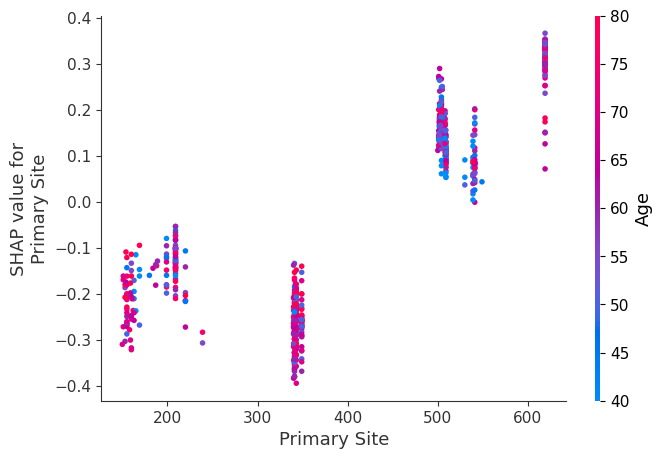

In [15]:
# Visualize the `dependence_plot` between the feature “Primary Site” and “Age.”
shap.dependence_plot("Primary Site", shap_values[1], X_test,interaction_index="Age")

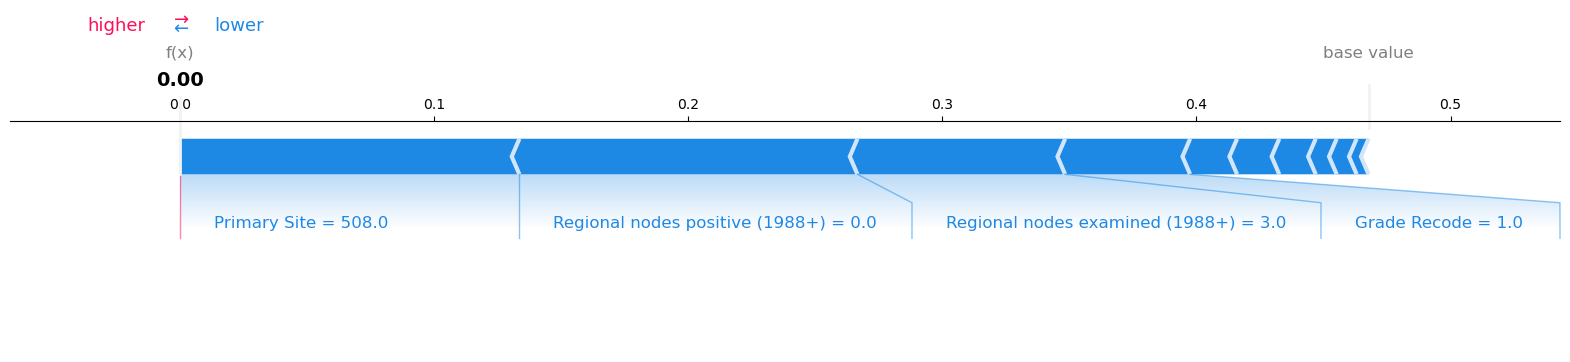

In [17]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

## Orginal code

In [6]:
# make a new data frame and store the useful attributes
final = df[['Behavior code ICD-O-3',
                'SEER cause-specific death classification',
                'Vital status recode (study cutoff used)',
                'Survival months',
                'Race recode (W, B, AI, API)',
                'Sex',
                'Grade Recode (thru 2017)',
                'Median household income inflation adj to 2021',
                'Survived','Marital status at diagnosis']]
final[:5]

,Behavior code ICD-O-3,SEER cause-specific death classification,Vital status recode (study cutoff used),Survival months,"Race recode (W, B, AI, API)",Sex,Grade Recode (thru 2017),Median household income inflation adj to 2021,Survived,Marital status at diagnosis
0,0,0,0,6,0,0,0,0,0.0,0
1,0,0,0,47,0,1,1,0,0.0,1
2,0,1,1,71,0,1,2,0,1.0,0
3,0,1,1,161,0,1,3,0,1.0,0
4,0,0,0,18,1,0,0,0,0.0,0


In [7]:
X= final[['Behavior code ICD-O-3','Grade Recode (thru 2017)','Race recode (W, B, AI, API)',
                'Sex','Median household income inflation adj to 2021']]
X

,Behavior code ICD-O-3,Grade Recode (thru 2017),"Race recode (W, B, AI, API)",Sex,Median household income inflation adj to 2021
0,0,0,0,0,0
1,0,1,0,1,0
2,0,2,0,1,0
3,0,3,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
4745,0,0,0,0,4
4746,0,0,0,1,7
4749,0,3,0,1,7
4751,0,0,2,0,5


In [8]:
y = final['Survived']
y

0       0.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
4745    0.0
4746    0.0
4749    1.0
4751    0.0
4752    0.0
Name: Survived, Length: 3922, dtype: float64

In [9]:
# create train and test data
X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3137, 5)
(785, 5)
(3137,)
(785,)


In [10]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# build the model
rf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)
rf.fit(X_train, y_train)

# make prediction on the testing data
y_pred = rf.predict(X_test)

# classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.66      0.69      0.67       335
         1.0       0.76      0.73      0.75       450

    accuracy                           0.71       785
   macro avg       0.71      0.71      0.71       785
weighted avg       0.72      0.71      0.72       785



In [11]:
# import shap and data visualization tool
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_test)

Variable Importance Plot - Global Interpretation


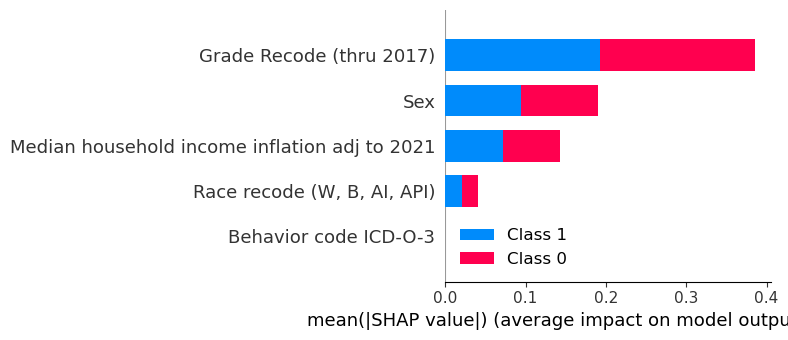

In [12]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

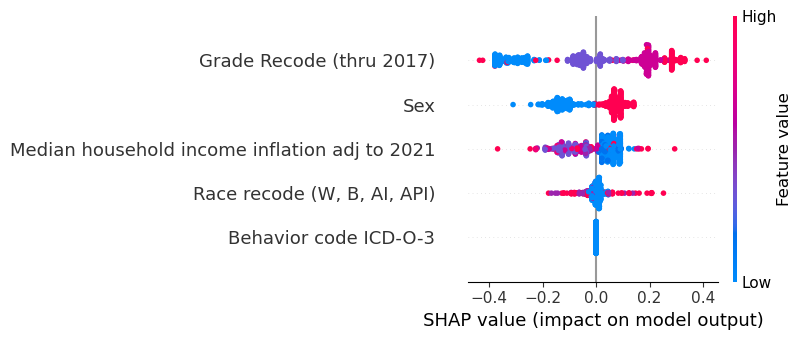

In [13]:
shap.summary_plot(shap_values[1], X_test)

# LIME

In [18]:
# import the LimeTabularExplainer module
import lime
import lime.lime_tabular
import numpy as np


# get the feature names
feature_names = list(X_test.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_test),
                                 feature_names=X_test.columns,
                                 class_names = ['Dead', 'Alive'], 
                                 mode = 'classification')

In [20]:
# predict_fn_rf = lambda x: rf.predict_proba(x).astype(float)
print(X_test.iloc[3])
print(y_test.iloc[3])
exp = explainer.explain_instance(X_test.iloc[3], rf.predict_proba)
exp.show_in_notebook(show_all=False)

Race recode (W, B, AI, API)          1
Sex                                  1
Radiation recode                     0
Regional nodes examined (1988+)      0
Regional nodes positive (1988+)     98
Primary Site                       341
Marital status at diagnosis          0
Age                                 70
Income                              75
Tumor Size                           0
Grade Recode                         3
Name: 1880, dtype: int64
0


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
